# Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

## Constants

In [20]:
# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
B2_m = 4e-5  # Drag coefficient at ground level (1/m)
a = 6.5e-3  # Temperature lapse rate (K/m)
ground_temp = 293  # Ground temperature (K)
gamma = 1.4  # Adiabatic index
dt = 0.01  # Time step (s)

# Initial conditions
angle = 45  # Launch angle in degrees
velocity = 700  # Initial velocity (m/s)

In [26]:
# Projectile motion of the cannon ball when no drag is introduced
def trajectory_gravity_only(angle, velocity):
  angle_rad = np.radians(angle)
  vx, vy = velocity * np.cos(angle_rad), velocity * np.sin(angle_rad)
  x, y = [0], [0]
  while y[-1] >= 0:
      x.append(x[-1] + vx * dt)
      vy -= g * dt
      y.append(y[-1] + vy * dt)
  return x, y

In [27]:
def trajectory_constant_drag(angle, velocity):
    angle_rad = np.radians(angle)
    vx, vy = velocity * np.cos(angle_rad), velocity * np.sin(angle_rad)
    x, y = [0], [0]
    while y[-1] >= 0:
        v = np.sqrt(vx**2 + vy**2)
        drag = B2_m * v**2
        vx -= (drag * vx / v) * dt
        vy -= (g + drag * vy / v) * dt
        x.append(x[-1] + vx * dt)
        y.append(y[-1] + vy * dt)
    return x, y

In [32]:
def trajectory_isothermal_drag(angle, velocity):
  angle_rad = np.radians(angle)
  vx, vy = velocity * np.cos(angle_rad), velocity * np.sin(angle_rad)
  x, y = [0], [0]
  while y[-1] >= 0:
      v = np.sqrt(vx**2 + vy**2)
      density_factor = np.exp(-y[-1] / 8500)  # Scale height ~8500m
      drag = B2_m * density_factor * v**2
      vx -= (drag * vx / v) * dt
      vy -= (g + drag * vy / v) * dt
      x.append(x[-1] + vx * dt)
      y.append(y[-1] + vy * dt)
  return x, y

In [29]:
def trajectory_adiabatic_drag(angle, velocity):
    angle_rad = np.radians(angle)
    vx, vy = velocity * np.cos(angle_rad), velocity * np.sin(angle_rad)
    x, y = [0], [0]
    while y[-1] >= 0:
        v = np.sqrt(vx**2 + vy**2)
        density_factor = (1 - (a * y[-1] / Tgrd))**(1 / (gamma - 1))
        drag = B2_m * density_factor * v**2
        vx -= (drag * vx / v) * dt
        vy -= (g + drag * vy / v) * dt
        x.append(x[-1] + vx * dt)
        y.append(y[-1] + vy * dt)
    return x, y

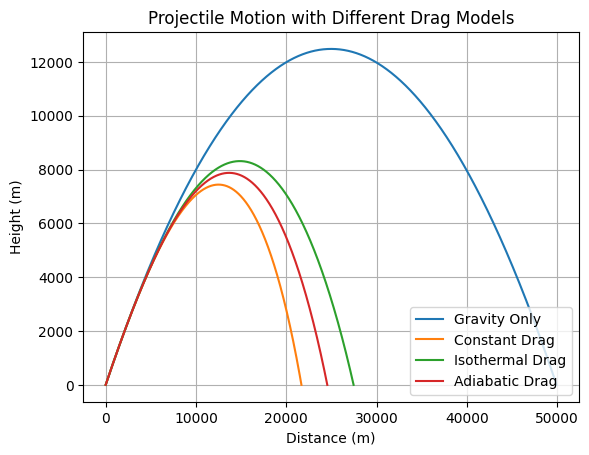

In [33]:
# Compute and plot trajectories
models = [trajectory_gravity_only, trajectory_constant_drag, trajectory_isothermal_drag, trajectory_adiabatic_drag]
labels = ['Gravity Only', 'Constant Drag', 'Isothermal Drag', 'Adiabatic Drag']

for model, label in zip(models, labels):
    x, y = model(angle, velocity)
    plt.plot(x, y, label=label)

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion with Different Drag Models')
plt.legend()
plt.grid()
plt.show()